In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,models

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the CIFAR-10 dataset
pic = cifar10.load_data()
(train_images, train_labels), (test_images, test_labels) = pic

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
# Data augmentation for training data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Data augmentation for test data (only rescaling)
test_datagen = ImageDataGenerator(rescale=1./255)

# Apply the transformations to the training and test data
train_generator = train_datagen.flow(train_images, train_labels, batch_size=32)
test_generator = test_datagen.flow(test_images, test_labels, batch_size=32)


In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.applications import VGG16, ResNet50

In [ ]:
# Transfer Learning with VGG16
def create_vgg16_model():
  base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
  base_model.trainable = False  # Freeze base model layers

  model = models.Sequential([
      base_model,
      layers.Flatten(),
      layers.Dense(256, activation='relu'),
      layers.Dense(10, activation='softmax')
  ])
  return model

In [ ]:
# Transfer Learning with ResNet50
def create_resnet50_model():
  base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
  base_model.trainable = False  # Freeze base model layers

  model = models.Sequential([
      base_model,
      layers.Flatten(),
      layers.Dense(256, activation='relu'),
      layers.Dense(10, activation='softmax')
  ])
  return model

In [ ]:
# Choose a model (VGG16 or ResNet50)
model = create_vgg16_model()

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(train_generator,
                    epochs=20,
                    validation_data=test_generator)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.5606 - loss: 1.2443 - val_accuracy: 0.5793 - val_loss: 1.1888
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.5626 - loss: 1.2342 - val_accuracy: 0.6003 - val_loss: 1.1417
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.5640 - loss: 1.2367 - val_accuracy: 0.5935 - val_loss: 1.1610
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.5675 - loss: 1.2247 - val_accuracy: 0.5850 - val_loss: 1.1816
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.5647 - loss: 1.2284 - val_accuracy: 0.5970 - val_loss: 1.1478
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.5665 - loss: 1.2183 - val_accuracy: 0.5905 - val_loss: 1.1719
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 27ms/step - accuracy: 0.5693 - loss: 1.2124 - val_accuracy: 0.5995 - val_loss: 1.1348
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.5713 -

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_generator)
print(f'Test accuracy: {test_acc}')



313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6068 - loss: 1.1452
Test accuracy: 0.5997999906539917


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


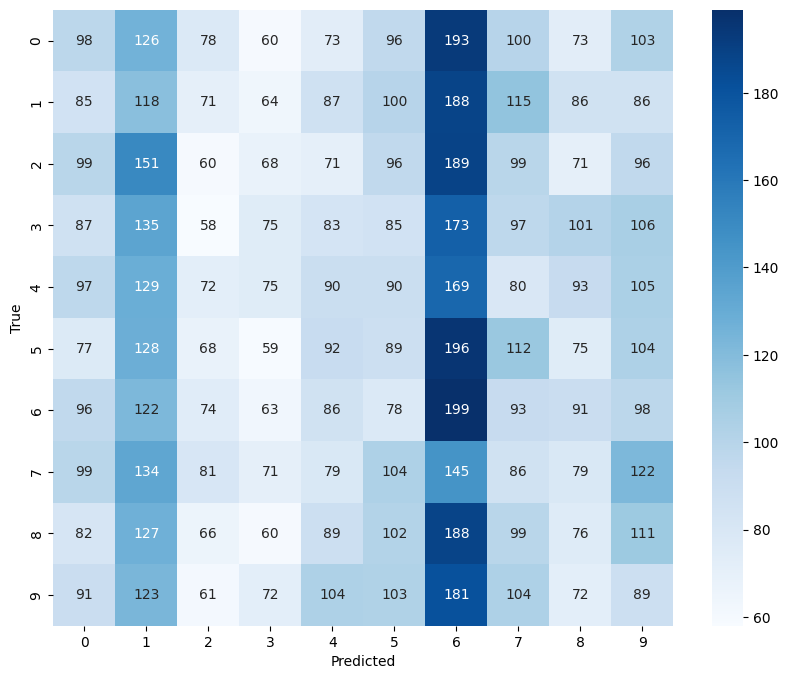

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predictions
predictions = model.predict(test_generator)
predicted_labels = np.argmax(predictions, axis=1)
true_labels = test_labels.flatten()

# Compute confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


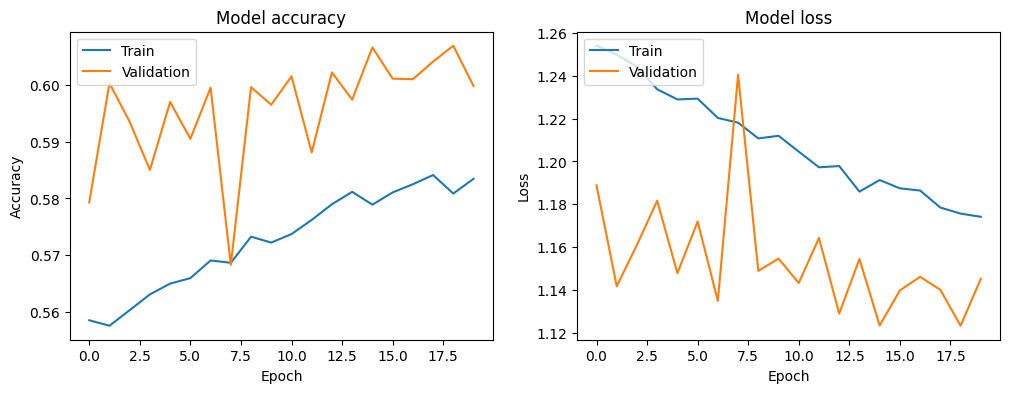

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


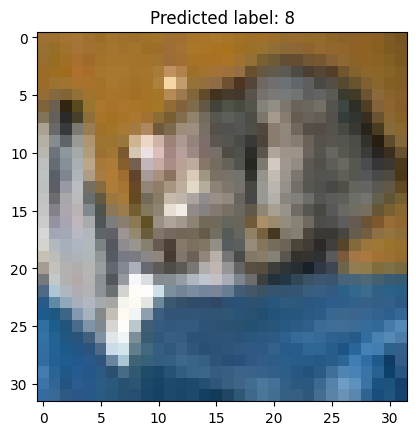

In [ ]:
import numpy as np

# Making predictions on the test data
predictions = model.predict(test_generator)

# Example: Displaying the prediction for the first image in the test set
test_index = 0  # Change this to visualize different images

# Get the image from the test set
test_image = test_images[test_index]

# Get the prediction
predicted_label = np.argmax(predictions[test_index])

# Display the result
import matplotlib.pyplot as plt

plt.imshow(test_image)
plt.title(f'Predicted label: {predicted_label}')
plt.show()